In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words

import nltk
import os
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import math

# %load_ext autotime

In [2]:
dataset = pd.read_excel("/Users/chaupham/Downloads/IEEE VIS papers 1990-2018 (1).xlsx")

In [3]:
dataset.head(2)

,Conference,Year,Title,DOI,Link,FirstPage,LastPage,PaperType,Abstract,AuthorNames-Deduped,AuthorNames,AuthorAffiliation,InternalReferences,AuthorKeywords,AminerCitationCount_02-2020,AminerCitationCount_06-2020,XploreCitationCount - 2020-01,PubsCited,Award
0,Vis,1990,Interdisciplinary visualization: lessons learn...,10.0000/00000002,http://dl.acm.org/citation.cfm?id=949606&CFID=...,457,457,M,NaN,Donna J. Cox,Donna J. Cox,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,Vis,1990,Surface representations of two- and three-dime...,10.1109/VISUAL.1990.146359,http://dx.doi.org/10.1109/VISUAL.1990.146359,6,"13, 460",C,The use of critical point analysis to generate...,James Helman;Lambertus Hesselink,J.L. Helman;L. Hesselink,"Stanford Univ., CA, USA;Stanford Univ., CA, USA",NaN,NaN,67.0,71.0,0.0,11.0,BP


In [4]:
dataset.Conference.value_counts()

Vis        1458
InfoVis     770
VAST        632
SciVis      248
Name: Conference, dtype: int64

In [5]:
dataset.shape

(3108, 19)

In [6]:
dataset.dropna(subset = ["Abstract"], inplace=True)
dataset.shape

(3035, 19)

In [7]:
dataset.drop_duplicates(["Abstract"], inplace=True)
dataset.shape

(3034, 19)

In [8]:
dataset.PaperType.value_counts()

C    1516
J    1247
M     271
Name: PaperType, dtype: int64

In [9]:
(dataset.InternalReferences.value_counts())

10.1109/VISUAL.1991.175773                                                                                                                                                                                                                                                                                 5
10.1109/VISUAL.1991.175782                                                                                                                                                                                                                                                                                 5
10.1109/VISUAL.1991.175771                                                                                                                                                                                                                                                                                 5
10.1109/VISUAL.1992.235219                                                                       

In [18]:
list_id = list(dataset.DOI)
doi_to_id_mapping = {list_id[i]:i for i in range(len(list_id))}
doi_to_id_mapping

{'10.1109/VISUAL.1990.146359': 0,
 '10.1109/VISUAL.1990.146360': 1,
 '10.1109/VISUAL.1990.146361': 2,
 '10.1109/VISUAL.1990.146362': 3,
 '10.1109/VISUAL.1990.146363': 4,
 '10.1109/VISUAL.1990.146364': 5,
 '10.1109/VISUAL.1990.146365': 6,
 '10.1109/VISUAL.1990.146366': 7,
 '10.1109/VISUAL.1990.146367': 8,
 '10.1109/VISUAL.1990.146368': 9,
 '10.1109/VISUAL.1990.146369': 10,
 '10.1109/VISUAL.1990.146370': 11,
 '10.1109/VISUAL.1990.146371': 12,
 '10.1109/VISUAL.1990.146372': 13,
 '10.1109/VISUAL.1990.146373': 14,
 '10.1109/VISUAL.1990.146374': 15,
 '10.1109/VISUAL.1990.146375': 16,
 '10.1109/VISUAL.1990.146376': 17,
 '10.1109/VISUAL.1990.146377': 18,
 '10.1109/VISUAL.1990.146378': 19,
 '10.1109/VISUAL.1990.146379': 20,
 '10.1109/VISUAL.1990.146380': 21,
 '10.1109/VISUAL.1990.146381': 22,
 '10.1109/VISUAL.1990.146382': 23,
 '10.1109/VISUAL.1990.146383': 24,
 '10.1109/VISUAL.1990.146384': 25,
 '10.1109/VISUAL.1990.146385': 26,
 '10.1109/VISUAL.1990.146386': 27,
 '10.1109/VISUAL.1990.146387':

In [19]:
def map_doi_to_id(doi, doi_to_id_mapping=doi_to_id_mapping):
    return doi_to_id_mapping[doi]
tmp  = ['10.1109/VISUAL.1990.146359', '10.1109/VISUAL.1990.146360']
list(map(map_doi_to_id, tmp))

[0, 1]

In [20]:
len(doi_to_id_mapping)

3034

In [21]:
def map_doi_to_id(doi, doi_to_id_mapping=doi_to_id_mapping):
    return doi_to_id_mapping.get(doi)

def remove_none_in_list(my_list):
    res = [l for l in my_list if l is not None]
    return res

In [22]:
list_ref = list(dataset.InternalReferences)
mapping= {i: remove_none_in_list(list(map(map_doi_to_id, list_ref[i].split(";")))) if list_ref[i] is not np.nan else [] for i in range(len(list_ref))}
mapping

{0: [],
 1: [],
 2: [],
 3: [],
 4: [29],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [],
 57: [1, 0],
 58: [],
 59: [],
 60: [],
 61: [31],
 62: [42],
 63: [4],
 64: [],
 65: [],
 66: [],
 67: [],
 68: [],
 69: [27, 43, 28, 30],
 70: [],
 71: [],
 72: [],
 73: [],
 74: [],
 75: [],
 76: [],
 77: [],
 78: [],
 79: [],
 80: [29, 14, 3, 63, 4],
 81: [],
 82: [],
 83: [3, 38, 23, 88],
 84: [],
 85: [],
 86: [],
 87: [],
 88: [83],
 89: [],
 90: [],
 91: [],
 92: [],
 93: [],
 94: [11],
 95: [],
 96: [],
 97: [],
 98: [],
 99: [],
 100: [],
 101: [],
 102: [],
 103: [],
 104: [],
 1

In [23]:
dataset["id"] = dataset.DOI.map(doi_to_id_mapping)
dataset.head()

,Conference,Year,Title,DOI,Link,FirstPage,LastPage,PaperType,Abstract,AuthorNames-Deduped,AuthorNames,AuthorAffiliation,InternalReferences,AuthorKeywords,AminerCitationCount_02-2020,AminerCitationCount_06-2020,XploreCitationCount - 2020-01,PubsCited,Award,id
1,Vis,1990,Surface representations of two- and three-dime...,10.1109/VISUAL.1990.146359,http://dx.doi.org/10.1109/VISUAL.1990.146359,6,"13, 460",C,The use of critical point analysis to generate...,James Helman;Lambertus Hesselink,J.L. Helman;L. Hesselink,"Stanford Univ., CA, USA;Stanford Univ., CA, USA",NaN,NaN,67.0,71.0,0.0,11.0,BP,0
2,Vis,1990,FAST: a multi-processed environment for visual...,10.1109/VISUAL.1990.146360,http://dx.doi.org/10.1109/VISUAL.1990.146360,14,"27, 461-2",C,The authors discuss FAST (flow analysis softwa...,Gordon V. Bancroft;Fergus Merritt;Todd Plessel...,G.V. Bancroft;F.J. Merritt;T.C. Plessel;P.G. K...,"Sterling Federal Syst. Inc., Palo Alto, CA, US...",NaN,NaN,71.0,68.0,6.0,20.0,NaN,1
3,Vis,1990,The VIS-5D system for easy interactive visuali...,10.1109/VISUAL.1990.146361,http://dx.doi.org/10.1109/VISUAL.1990.146361,28,"35, 462",C,The VIS-5D system provides highly interactive ...,William L. Hibbard;David A. Santek,B. Hibbard;D. Santek,"Space Sci. & Eng. Center, Wisconsin Univ., Mad...",NaN,NaN,67.0,68.0,5.0,2.0,NaN,2
4,Vis,1990,A procedural interface for volume rendering,10.1109/VISUAL.1990.146362,http://dx.doi.org/10.1109/VISUAL.1990.146362,36,"44, 462",C,"The author presents a simple, procedural inter...",James L. Montine,J.L. Montine,"Alliant Comput. Syst., Littleton, MA, USA",NaN,NaN,13.0,13.0,3.0,9.0,NaN,3
5,Vis,1990,Techniques for the interactive visualization o...,10.1109/VISUAL.1990.146363,http://dx.doi.org/10.1109/VISUAL.1990.146363,45,"50, 462-3",C,Some ideas and techniques for visualizing volu...,Gregory M. Nielson;Bernd Hamann,G.M. Nielson;B. Hamann,"Dept. of Comput. Sci., Arizona State Univ., Te...",10.1109/VISUAL.1990.146388,NaN,19.0,19.0,2.0,35.0,NaN,4


In [24]:
new_col_order = ['Conference', 'Year', 'Title', 'DOI', 'id', 'Link', 'FirstPage', 'LastPage',
       'PaperType', 'Abstract', 'AuthorNames-Deduped', 'AuthorNames',
       'AuthorAffiliation', 'InternalReferences', 'AuthorKeywords',
       'AminerCitationCount_02-2020', 'AminerCitationCount_06-2020',
       'XploreCitationCount - 2020-01', 'PubsCited', 'Award' ]
dataset = dataset[new_col_order]

In [25]:
dataset[dataset.Title.str.contains("TimeSeer")]

,Conference,Year,Title,DOI,id,Link,FirstPage,LastPage,PaperType,Abstract,AuthorNames-Deduped,AuthorNames,AuthorAffiliation,InternalReferences,AuthorKeywords,AminerCitationCount_02-2020,AminerCitationCount_06-2020,XploreCitationCount - 2020-01,PubsCited,Award


In [26]:
dataset[dataset.AuthorNames.fillna("").str.contains("Tuan Dang")]

,Conference,Year,Title,DOI,id,Link,FirstPage,LastPage,PaperType,Abstract,AuthorNames-Deduped,AuthorNames,AuthorAffiliation,InternalReferences,AuthorKeywords,AminerCitationCount_02-2020,AminerCitationCount_06-2020,XploreCitationCount - 2020-01,PubsCited,Award


In [27]:
set_ego = []
for node in mapping[1928]:
    set_ego.extend(mapping[node])

set_ego = set(set_ego)
set_ego

{27,
 43,
 242,
 262,
 289,
 449,
 544,
 639,
 716,
 889,
 988,
 1126,
 1137,
 1249,
 1250,
 1377,
 1407,
 1409,
 1606,
 1618,
 1646,
 1786}

In [28]:
len(set_ego
   )

22

In [29]:
dataset[dataset.AuthorNames.fillna("").str.contains("Tuan Nhon Dang")]

,Conference,Year,Title,DOI,id,Link,FirstPage,LastPage,PaperType,Abstract,AuthorNames-Deduped,AuthorNames,AuthorAffiliation,InternalReferences,AuthorKeywords,AminerCitationCount_02-2020,AminerCitationCount_06-2020,XploreCitationCount - 2020-01,PubsCited,Award
2002,InfoVis,2010,Stacking Graphic Elements to Avoid Over-Plotting,10.1109/TVCG.2010.197,1928,http://dx.doi.org/10.1109/TVCG.2010.197,1044,1052,J,An ongoing challenge for information visualiza...,Tommy Dang;Leland Wilkinson;Anushka Anand,Tuan Nhon Dang;Leland Wilkinson;Anushka Anand,NaN,10.1109/INFVIS.2005.1532139;10.1109/INFVIS.200...,"Dot plots, Parallel coordinate plots, Multidim...",27.0,38.0,33.0,38.0,NaN
2190,VAST,2011,Using random projections to identify class-sep...,10.1109/VAST.2011.6102465,2116,http://dx.doi.org/10.1109/VAST.2011.6102465,263,264,M,Projection Pursuit has been an effective metho...,Anushka Anand;Leland Wilkinson;Tommy Dang,Anushka Anand;Leland Wilkinson;Tuan Nhon Dang,"Department of Computer Science, University of ...",NaN,NaN,2.0,2.0,1.0,12.0,NaN
2322,VAST,2012,Visual pattern discovery using random projections,10.1109/VAST.2012.6400490,2248,http://dx.doi.org/10.1109/VAST.2012.6400490,43,52,C,An essential element of exploratory data analy...,Anushka Anand;Leland Wilkinson;Tommy Dang,Anushka Anand;Leland Wilkinson;Tuan Nhon Dang,"Department of Computer Science, University of ...",10.1109/VAST.2010.5652433;10.1109/TVCG.2011.17...,"Random Projections, High-dimensional Data",17.0,25.0,16.0,49.0,NaN
2533,VAST,2014,Transforming Scagnostics to Reveal Hidden Feat...,10.1109/TVCG.2014.2346572,2459,http://dx.doi.org/10.1109/TVCG.2014.2346572,1624,1632,J,Scagnostics (Scatterplot Diagnostics) were dev...,Tommy Dang;Leland Wilkinson,Tuan Nhon Dang;Leland Wilkinson,"Department of Computer Science, University of ...",10.1109/TVCG.2006.163;10.1109/INFVIS.2005.1532...,"Scagnostics, Scatterplot matrix, Transformatio...",6.0,12.0,11.0,44.0,NaN


In [30]:
dataset.Conference.value_counts()

Vis        1417
InfoVis     739
VAST        630
SciVis      248
Name: Conference, dtype: int64

In [31]:
for conf in list(dataset.Conference.value_counts().index):
    print(len(Counter(dataset[dataset["Conference"] == conf].Year)))

22
24
13
7


In [32]:
# dataset.to_csv("./dataset.csv", index=False)


In [33]:
import numpy as np
import scipy.sparse as sp

mat = sp.dok_matrix((dataset.shape[0],dataset.shape[0]), dtype=np.int8)

for paper, citation_list in mapping.items():
    mat[paper, citation_list] = 1
    mat[citation_list, paper] = 1

mat =mat.tocsr()

In [325]:
def check_symmetric(Ms):
    return (abs(Ms-Ms.T)>1e-10).nnz == 0
check_symmetric(mat)

True

In [326]:
import dill

#### Write
with open('adj.pkl', 'wb') as f:     
    dill.dump(mat, f)

In [ ]:
labels = list(dataset.)

In [335]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(dataset.Conference)

import dill
#### Write
with open('train.pkl', 'wb') as f:     
    dill.dump(labels, f)
    
labels

array([3, 3, 3, ..., 2, 2, 2])

In [332]:
list(set(dataset.Conference))

['VAST', 'Vis', 'InfoVis', 'SciVis']

In [331]:
le.fit_transform(list(set(dataset.Conference)))

array([2, 3, 0, 1])

In [153]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [154]:
data = list(dataset.Abstract)

tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

In [200]:
max_epochs = 100
vec_size = 100
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =0)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

/Users/chaupham/opt/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/Users/chaupham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [201]:
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize(data[608].lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

V1_infer [-0.04942509  0.06586438 -0.04396797 -0.01778504  0.22251475 -0.34765738
 -0.2303197   0.01540423  0.24014975 -0.18197797 -0.06482136 -0.02885553
  0.07045597 -0.0108457  -0.00211021 -0.1851585  -0.12122341  0.01011377
  0.22872165  0.02126941  0.24677952  0.11365444  0.1008174  -0.2974876
 -0.25264385 -0.28282604 -0.27019507 -0.4151857   0.06398226 -0.22876088
  0.1131349  -0.12992455 -0.1517907   0.03689674 -0.08452463  0.07518211
 -0.1881234  -0.17975678 -0.01696821 -0.13938814 -0.11939938  0.14575092
 -0.06891061 -0.03536987 -0.00820137 -0.32427284 -0.10688992 -0.3307624
  0.01982541 -0.05481177 -0.28511307 -0.01607709 -0.08860857 -0.10919484
  0.15427436  0.03910683 -0.09670044  0.0309212   0.0117335  -0.24817744
 -0.1052615  -0.05632837 -0.18024878  0.09720417 -0.04060909  0.05069649
  0.04304601 -0.04614656  0.11384227  0.07515793  0.46346614 -0.21819083
  0.01716704  0.32752666  0.16209155  0.07568373  0.25750574  0.23915786
 -0.27741185 -0.13600895 -0.08600046  0.0293

In [202]:
# to find most similar doc using tags:
similar_doc = model.docvecs.most_similar([v1])
print(similar_doc)

[('608', 0.9328025579452515), ('2977', 0.532684326171875), ('889', 0.49051791429519653), ('1253', 0.4785679876804352), ('396', 0.4716196656227112), ('2776', 0.469749391078949), ('2424', 0.4526256322860718), ('368', 0.45067328214645386), ('657', 0.44890615344047546), ('290', 0.43276354670524597)]


In [203]:
def output_sentences(most_similar):
    for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(most_similar)//2), (f'LEAST ({len(most_similar)}th)', len(most_similar) - 1)]:
        print(u'%s %s: %s\n' % (label, most_similar[index][1], data[int(most_similar[index][0])]))

In [204]:
# to find most similar doc using tags
similar_doc = model.docvecs.most_similar([v1])
print(similar_doc)

# to print similar sentences
output_sentences(similar_doc) 

10
[('608', 0.9328025579452515), ('2977', 0.532684326171875), ('889', 0.49051791429519653), ('1253', 0.4785679876804352), ('396', 0.4716196656227112), ('2776', 0.469749391078949), ('2424', 0.4526256322860718), ('368', 0.45067328214645386), ('657', 0.44890615344047546), ('290', 0.43276354670524597)]
MOST 0.9328025579452515: In this paper we describe a battlefield visualization system, called Dragon, which we have implemented on a virtual reality responsive workbench. The Dragon system has been successfully deployed as part of two large military exercises: the Hunter Warrior advanced warfighting experiment, in March 1997, and the Joint Counter Mine advanced concept tactical demonstration, in August and September 1997. We describe battlefield visualization, the Dragon system, and the workbench, and we describe our experiences as part of these two real-world deployments, with an emphasis on lessons learned and needed future work.

SECOND-MOST 0.532684326171875: Visualization and virtual en

In [205]:
data[608]

'In this paper we describe a battlefield visualization system, called Dragon, which we have implemented on a virtual reality responsive workbench. The Dragon system has been successfully deployed as part of two large military exercises: the Hunter Warrior advanced warfighting experiment, in March 1997, and the Joint Counter Mine advanced concept tactical demonstration, in August and September 1997. We describe battlefield visualization, the Dragon system, and the workbench, and we describe our experiences as part of these two real-world deployments, with an emphasis on lessons learned and needed future work.'

In [218]:
res = model.docvecs.doctag_syn0

/Users/chaupham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


In [208]:
from scipy import spatial

result = 1 - spatial.distance.cosine(model.docvecs[608] , v1)
result

0.9328026175498962

In [225]:
res.shape


(3034, 100)

In [219]:
res[608]

array([-0.32297045,  0.865528  , -0.2832663 ,  0.37946904,  1.3826159 ,
       -1.5531737 , -0.824836  ,  1.0619949 ,  1.3552979 , -1.2540338 ,
       -0.69949484, -0.12261101,  0.7661365 , -0.5641689 ,  0.43067056,
       -0.91884345, -0.40494183, -0.0314959 ,  1.1135603 , -0.31762147,
        1.3950264 ,  0.4695014 ,  0.46291256, -1.0907534 , -1.4867282 ,
       -0.55343866, -0.7925515 , -2.4967074 ,  0.08583526, -1.2494825 ,
        0.5171291 , -0.5505262 , -0.6620927 ,  0.22381955,  0.14171037,
        0.6860781 , -0.94185567, -0.76972646, -0.07343727, -0.9971085 ,
       -0.31323197,  0.87733006,  0.14594653, -0.09282825, -0.24659337,
       -1.9328974 , -0.8386435 , -1.6010754 , -0.53607076, -0.3713847 ,
       -1.4280216 ,  0.00965982, -1.0716102 , -0.5375178 ,  0.949805  ,
        0.14095008, -0.6223756 , -0.11493235, -0.36834946, -1.3422072 ,
       -0.8798954 , -0.13542731, -1.2518721 , -0.23974858,  0.12800495,
        0.7750778 ,  0.2933346 , -0.25945696,  0.7056128 ,  0.11

In [229]:
import dill

#### Write
with open('features.pkl', 'wb') as f:     
    dill.dump(res, f)

(array([7.0000e+00, 2.9000e+01, 1.2800e+02, 5.4300e+02, 1.7740e+03,
        5.1000e+03, 1.1764e+04, 2.3596e+04, 3.7819e+04, 5.0321e+04,
        5.4240e+04, 4.8192e+04, 3.4243e+04, 2.0414e+04, 9.7310e+03,
        3.9080e+03, 1.2070e+03, 3.0800e+02, 6.2000e+01, 1.4000e+01]),
 array([-4.0323935 , -3.6523132 , -3.2722332 , -2.8921533 , -2.512073  ,
        -2.1319928 , -1.7519128 , -1.3718327 , -0.9917526 , -0.6116725 ,
        -0.23159242,  0.14848769,  0.5285678 ,  0.9086479 ,  1.288728  ,
         1.6688081 ,  2.0488882 ,  2.4289684 ,  2.8090484 ,  3.1891284 ,
         3.5692086 ], dtype=float32),
 <a list of 20 Patch objects>)

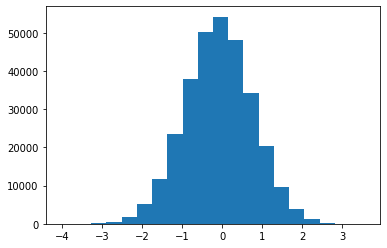

In [341]:
import matplotlib.pyplot as plt


res_flat = np.ndarray.flatten(res)
plt.hist(res_flat, bins=20)

In [352]:
tmp = Counter(np.ndarray.flatten(np.array(np.sum(mat, 1))))
{k: v for k, v in sorted(tmp.items(), key=lambda item: item[1])}

{74: 1,
 48: 1,
 52: 1,
 31: 1,
 42: 1,
 51: 1,
 38: 1,
 59: 1,
 46: 1,
 50: 1,
 64: 1,
 54: 1,
 41: 1,
 92: 1,
 44: 1,
 56: 1,
 65: 2,
 63: 2,
 37: 2,
 45: 2,
 40: 2,
 60: 2,
 61: 2,
 39: 2,
 35: 4,
 32: 4,
 30: 4,
 36: 5,
 33: 7,
 34: 8,
 29: 9,
 27: 13,
 24: 14,
 25: 15,
 28: 16,
 23: 19,
 26: 19,
 22: 28,
 21: 30,
 20: 34,
 18: 49,
 19: 50,
 17: 56,
 15: 59,
 16: 65,
 14: 91,
 13: 99,
 12: 106,
 10: 129,
 11: 137,
 8: 142,
 9: 147,
 7: 166,
 3: 167,
 6: 168,
 4: 173,
 2: 182,
 5: 183,
 1: 188,
 0: 416}